!pip install yellowbrick

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv("./IRIS.csv")  
df.head() 

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [36]:
# Getting the info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [37]:
# Describing the dataframe
df.describe() 

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

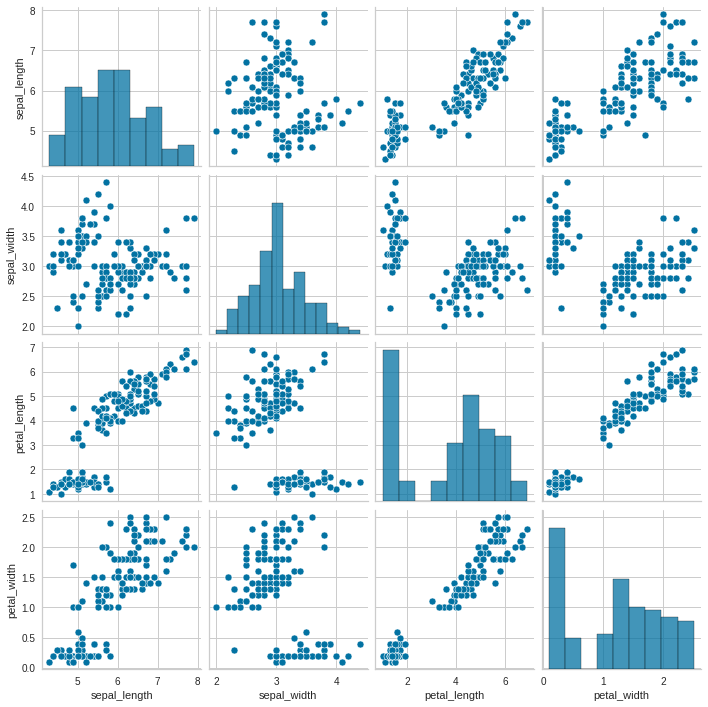

In [38]:
import seaborn as sns
sns.pairplot(df) 
# Plotting the columns in pairs

In [39]:
# Since species is a string we need to convert it to numerical value as algorithms only understand numbers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["species"] = encoder.fit_transform(df["species"].astype("str"))

In [40]:
X = df[["sepal_length","sepal_width","petal_length","petal_width"]]
y = df["species"]
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0      0
 1      0
 2      0
 3      0
 4      0
       ..
 145    2
 146    2
 147    2
 148    2
 149    2
 Name: species, Length: 150, dtype: int64)

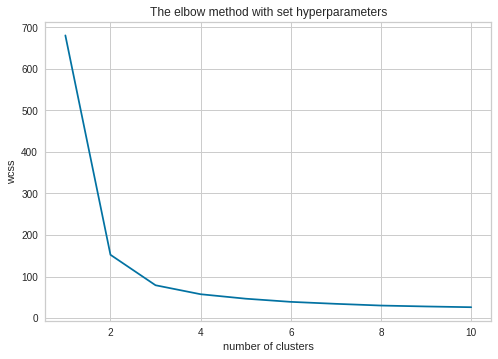

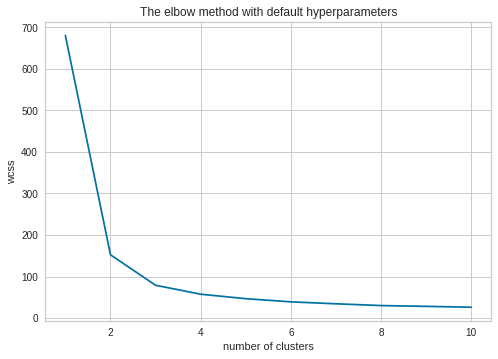

In [41]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

#plotting the results onto a Line graph, allowing us to observe "The elbow"
plt.plot(range(1, 11), wcss)
plt.title("The elbow method with set hyperparameters")
plt.xlabel("number of clusters")
plt.ylabel ("wcss") #within cluster sum of squares
plt.show()

wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("The elbow method with default hyperparameters")
plt.xlabel("number of clusters")
plt.ylabel ("wcss") #within cluster sum of squares
plt.show()


According to previous graphs optimal number of clusters is 3

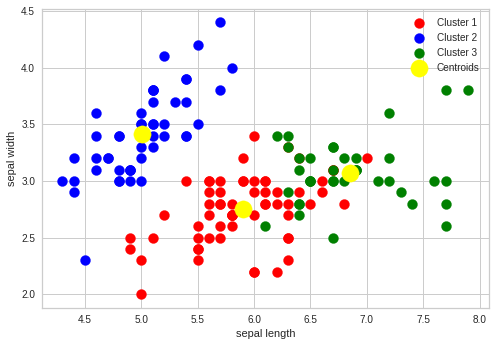

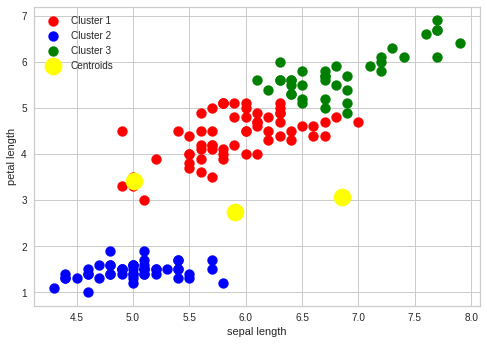

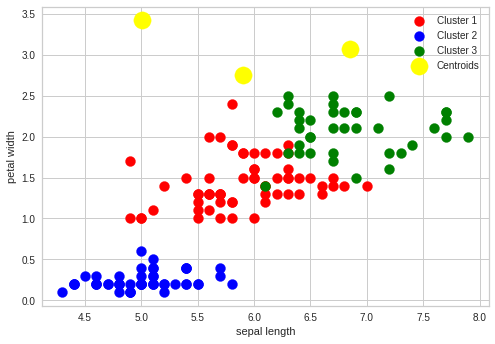

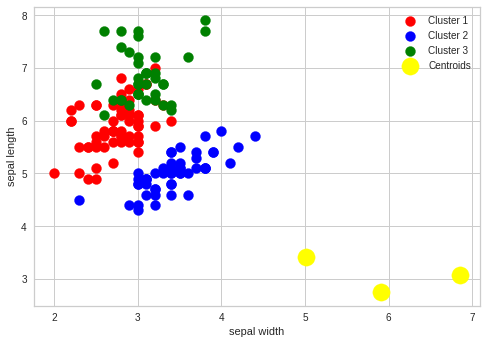

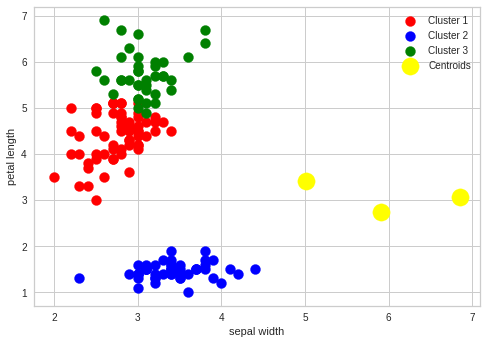

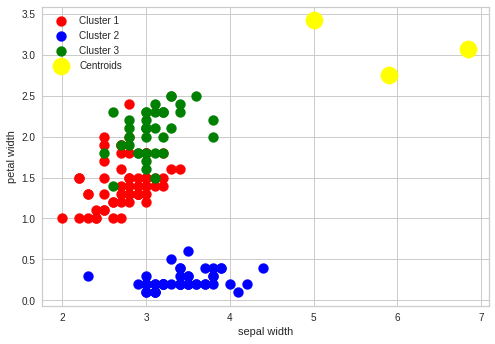

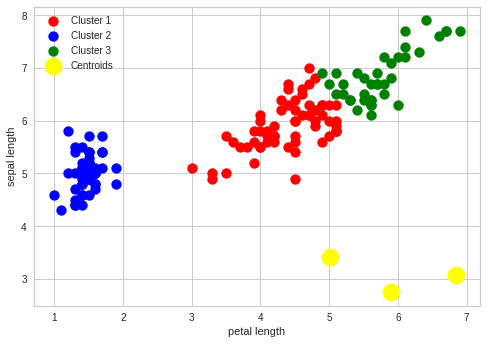

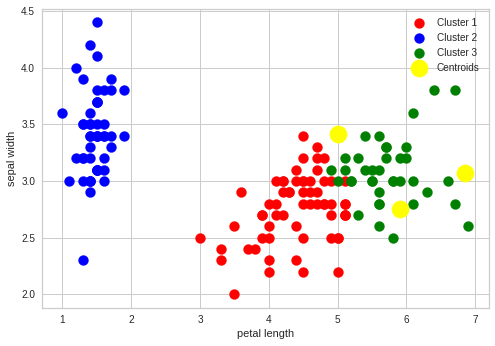

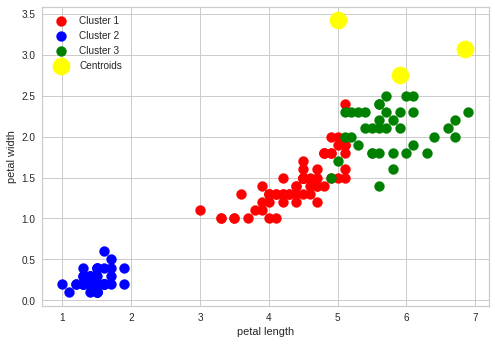

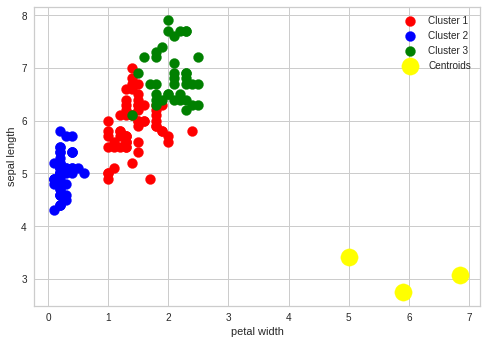

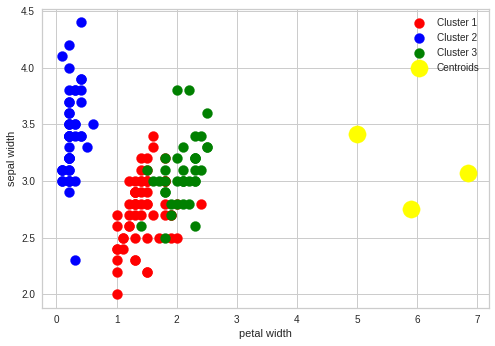

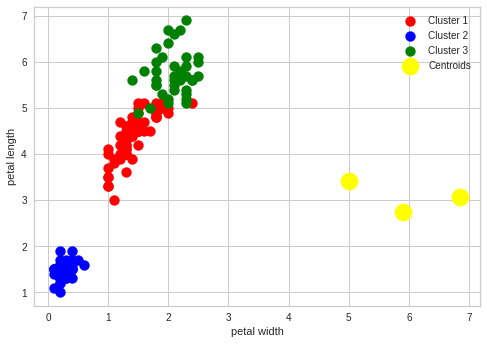

In [42]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

cols = ["sepal length","sepal width","petal length","petal width"]

X = np.array(X)
for i in range(0,len(cols)):
    for j in range(0,len(cols)):
        if j!=i:
            plt.scatter(X[y_kmeans == 0, i], X[y_kmeans == 0, j], s = 100, c = 'red', label = 'Cluster 1')
            plt.scatter(X[y_kmeans == 1, i], X[y_kmeans == 1, j], s = 100, c = 'blue', label = 'Cluster 2')
            plt.scatter(X[y_kmeans == 2, i], X[y_kmeans == 2, j], s = 100, c = 'green', label = 'Cluster 3')
            plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
            plt.xlabel(cols[i])
            plt.ylabel(cols[j])
            plt.legend()
            plt.show()

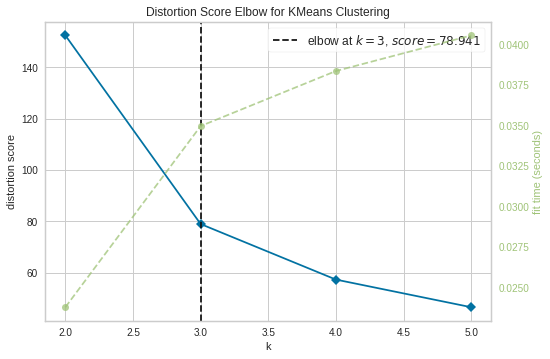

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [43]:
from yellowbrick.cluster import KElbowVisualizer

# Using the Elbow method to get the optimal number of k
model = KElbowVisualizer(KMeans(random_state=0), k=5)
model.fit(X)
model.show()

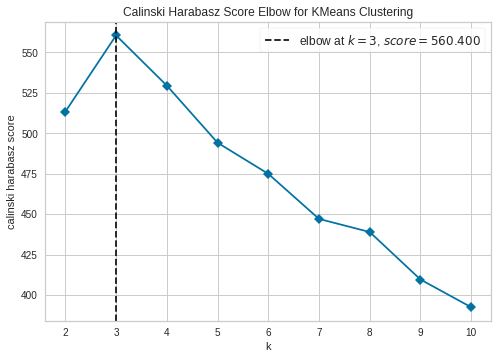

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [44]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='calinski_harabasz', timings=False)
visualizer.fit(X)
visualizer.show()

Optimal k is 3 using the Calinski Harabasz metric

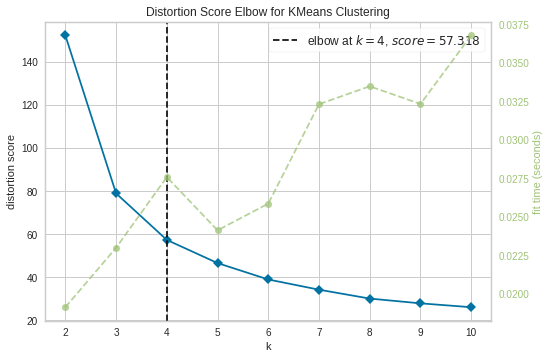

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
# Increasing the number of k to 10
model = KElbowVisualizer(KMeans(random_state=0), k=10)
model.fit(X)
model.show()

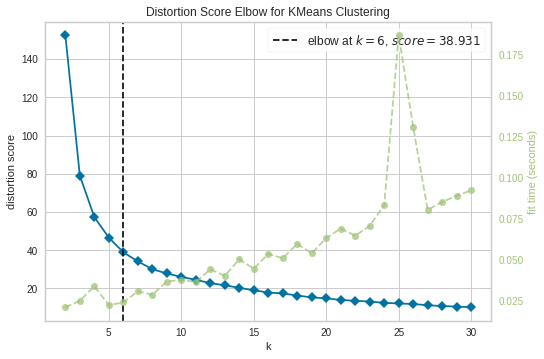

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [46]:
# Increasing the number of k to 30
model = KElbowVisualizer(KMeans(random_state=0), k=30)
model.fit(X)
model.show()

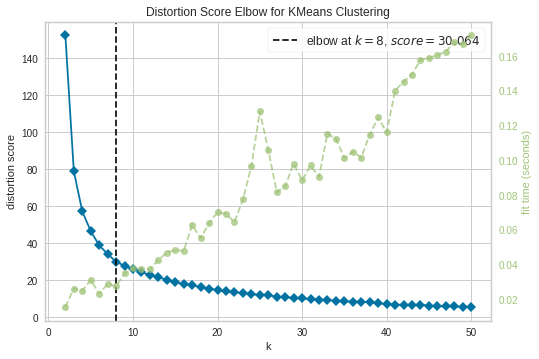

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
# Increasing the number of k to 50
model = KElbowVisualizer(KMeans(random_state=0), k=50)
model.fit(X)
model.show()

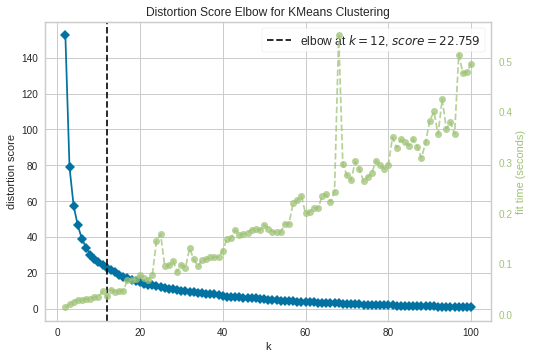

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [48]:
# Increasing the number of k to 100
model = KElbowVisualizer(KMeans(random_state=0), k=100)
model.fit(X)
model.show()

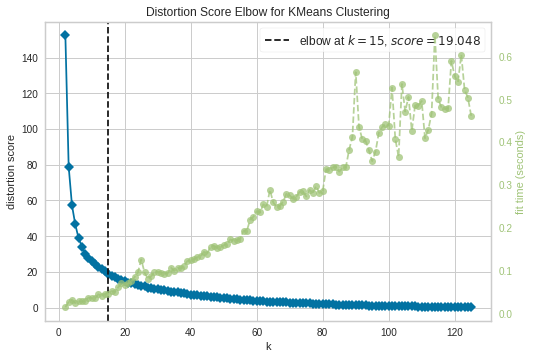

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [49]:
# Increasing the number of k to 125
model = KElbowVisualizer(KMeans(random_state=0), k=125)
model.fit(X)
model.show()

Optimal number of k changes as number of clusters increased

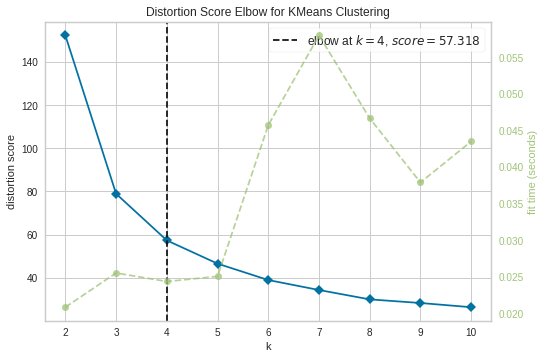

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [50]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11))
visualizer.fit(X)
visualizer.show()  

Optimal k is 4 using the Distortion metric

According to the elbow method optimal number of clusters is 4

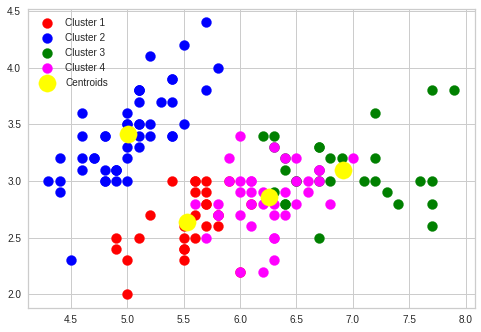

In [51]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

X = np.array(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'magenta', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

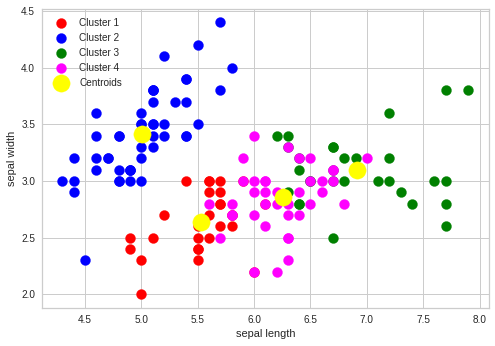

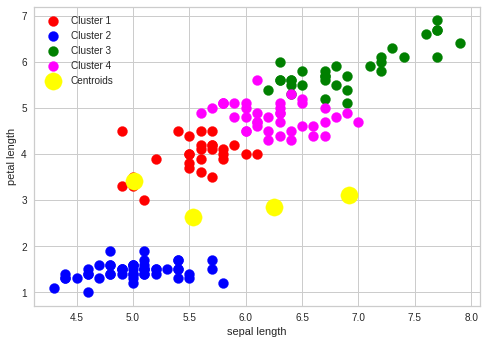

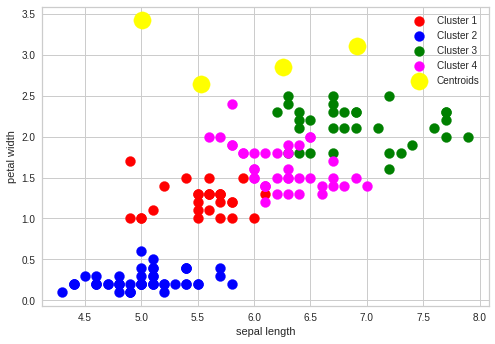

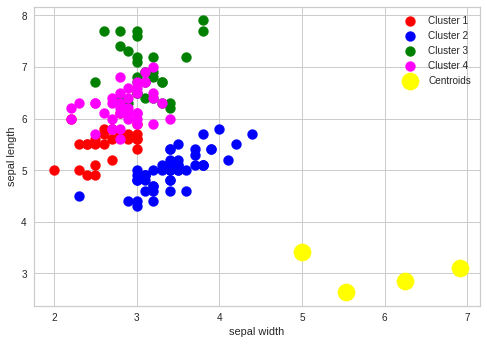

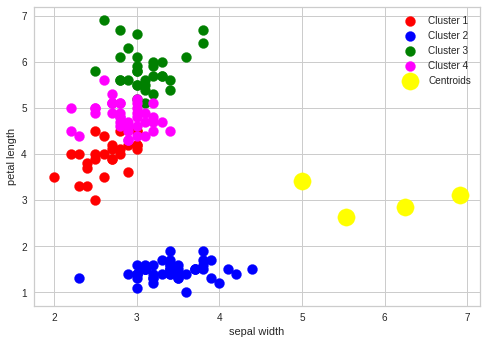

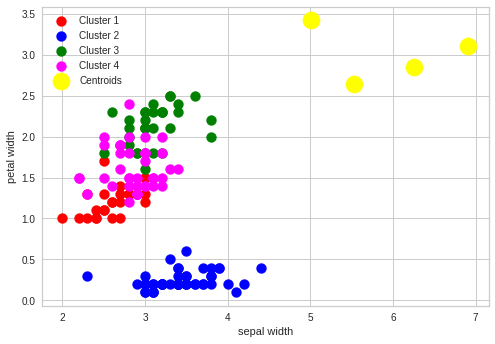

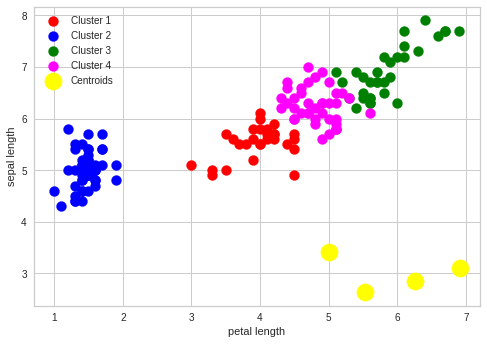

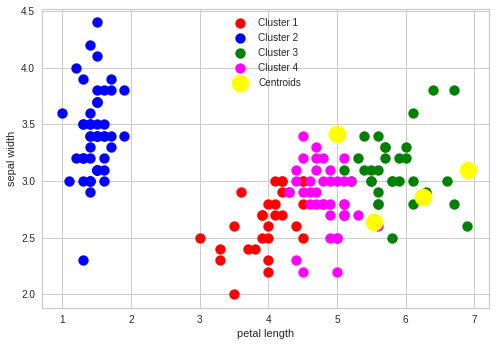

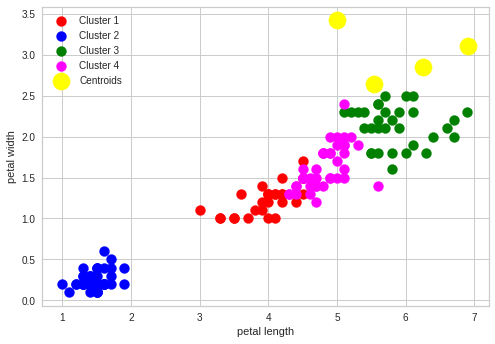

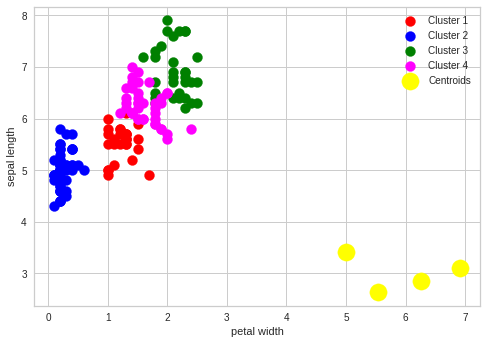

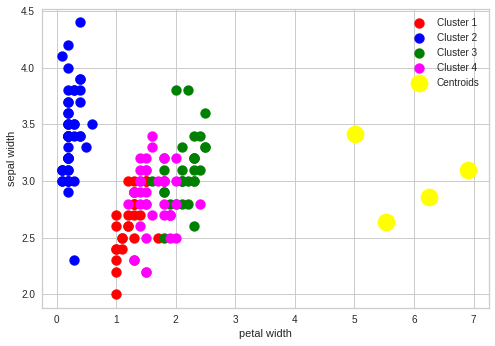

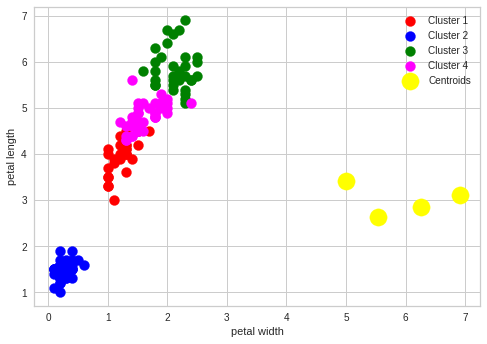

In [52]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

cols = ["sepal length","sepal width","petal length","petal width"]

X = np.array(X)
for i in range(0,len(cols)):
    for j in range(0,len(cols)):
        if j!=i:
            plt.scatter(X[y_kmeans == 0, i], X[y_kmeans == 0, j], s = 100, c = 'red', label = 'Cluster 1')
            plt.scatter(X[y_kmeans == 1, i], X[y_kmeans == 1, j], s = 100, c = 'blue', label = 'Cluster 2')
            plt.scatter(X[y_kmeans == 2, i], X[y_kmeans == 2, j], s = 100, c = 'green', label = 'Cluster 3')
            plt.scatter(X[y_kmeans == 3, i], X[y_kmeans == 3, j], s = 100, c = 'magenta', label = 'Cluster 4')
            plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, c = 'yellow', label = 'Centroids')
            plt.xlabel(cols[i])
            plt.ylabel(cols[j])
            plt.legend()
            plt.show()

Visualization for k = 3 clusters using silhouette score 

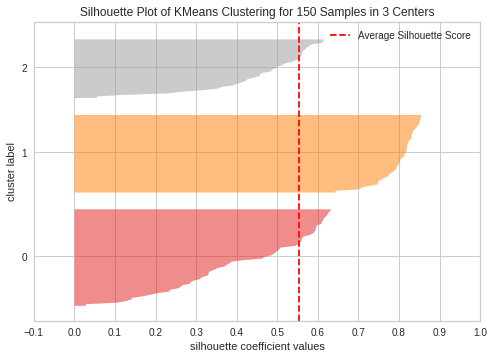

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [53]:
from yellowbrick.cluster import SilhouetteVisualizer

# Using the Silhouette method to get the optimal number of k
model = KMeans(3, random_state=0)
visualizer = SilhouetteVisualizer(model)
visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Visualization for k = 4 clusters using silhouette score 

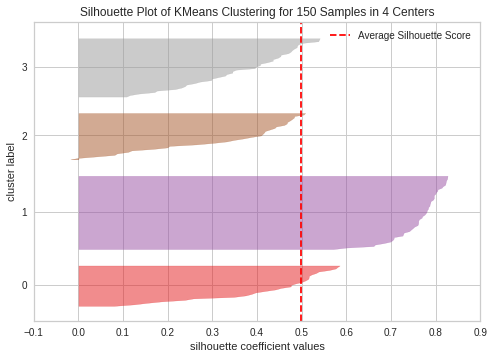

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [54]:
model = SilhouetteVisualizer(KMeans(4, random_state=0))
model.fit(X)
model.show()

Visualization for k = 2 to 11 clusters using silhouette score 

For n_clusters = 2 The average silhouette_score is : 0.6808136202936816
For n_clusters = 3 The average silhouette_score is : 0.5525919445499757
For n_clusters = 4 The average silhouette_score is : 0.4978256901095472
For n_clusters = 5 The average silhouette_score is : 0.4885175508886279
For n_clusters = 6 The average silhouette_score is : 0.37121805054590085
For n_clusters = 7 The average silhouette_score is : 0.3600597997328459
For n_clusters = 8 The average silhouette_score is : 0.3603749708042153
For n_clusters = 9 The average silhouette_score is : 0.3139310239112048
For n_clusters = 10 The average silhouette_score is : 0.3080145835492473


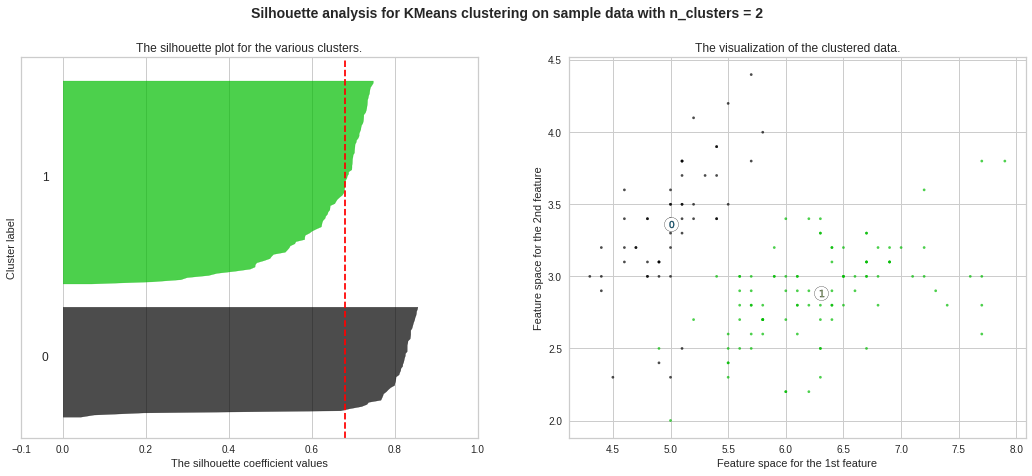

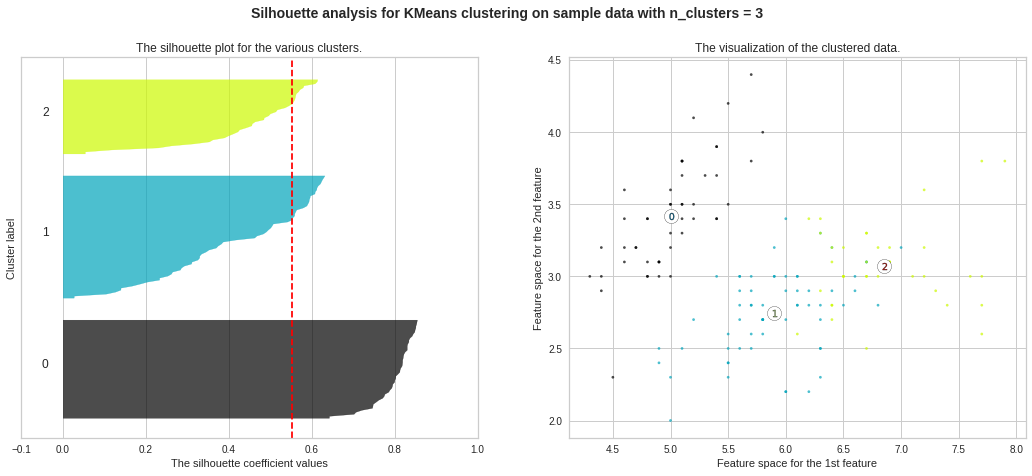

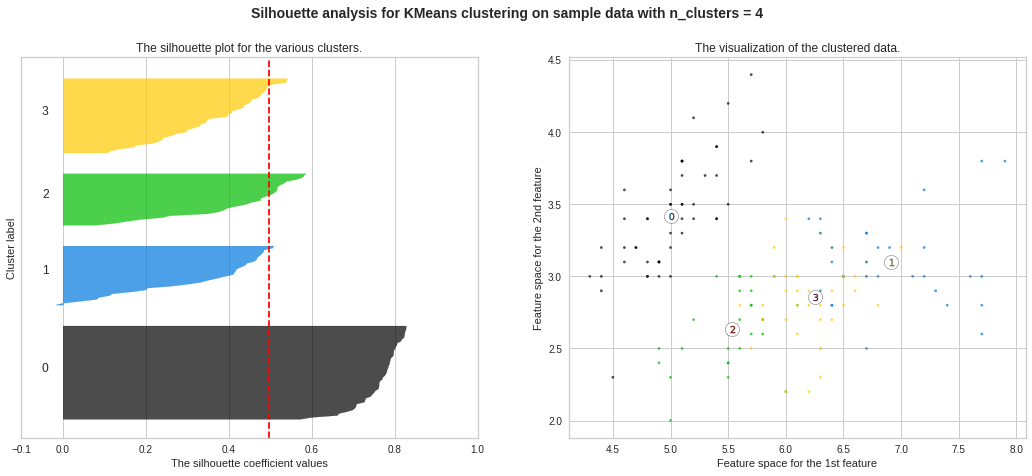

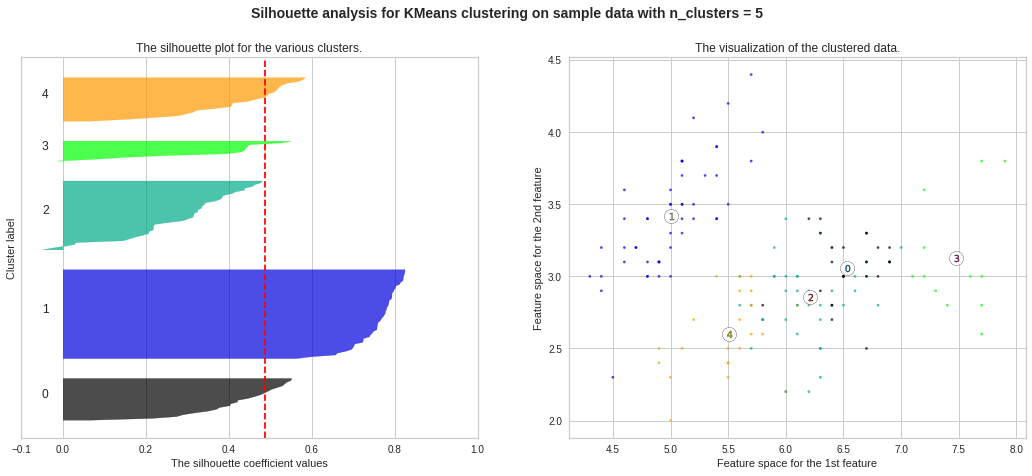

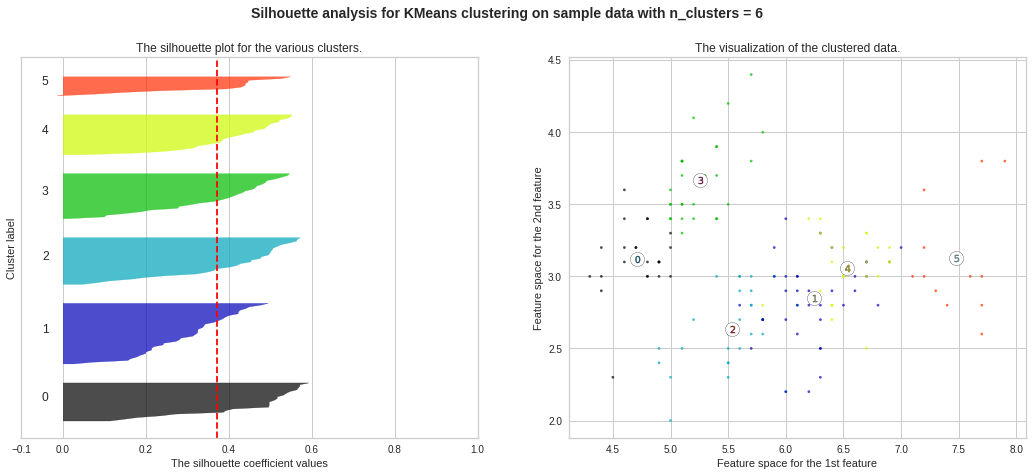

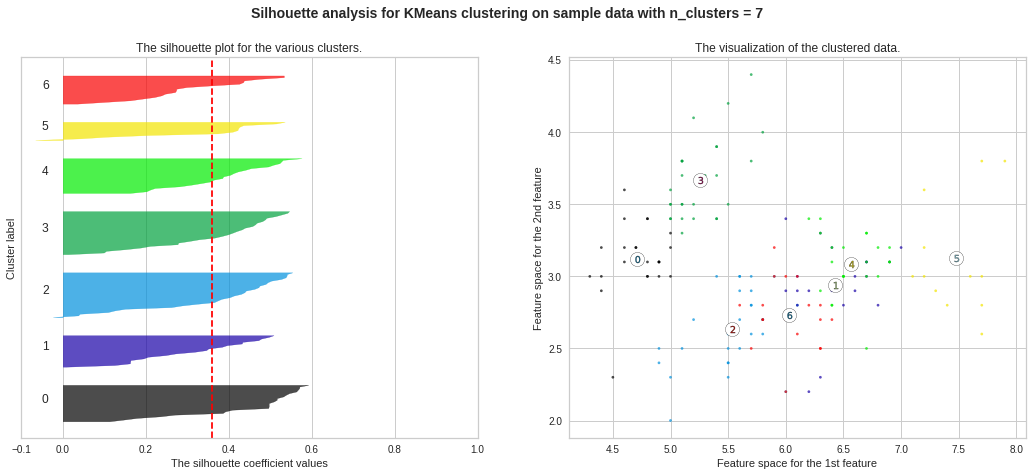

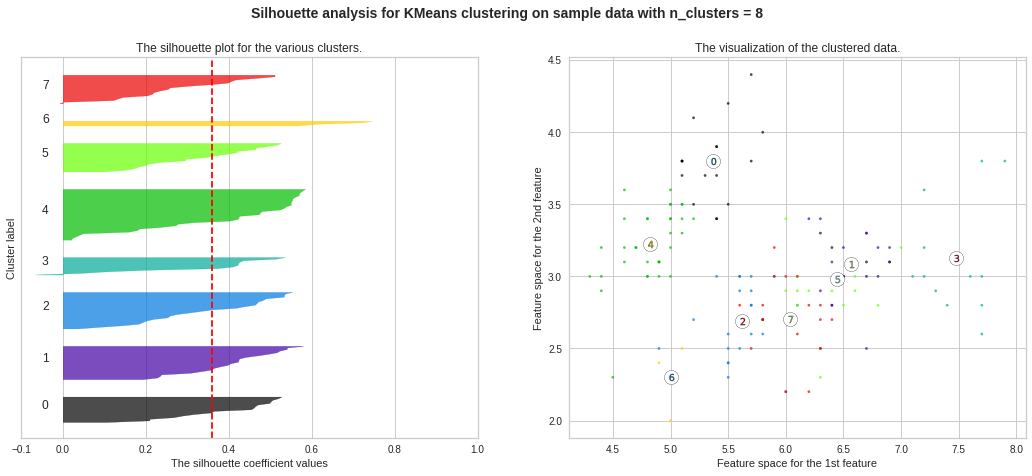

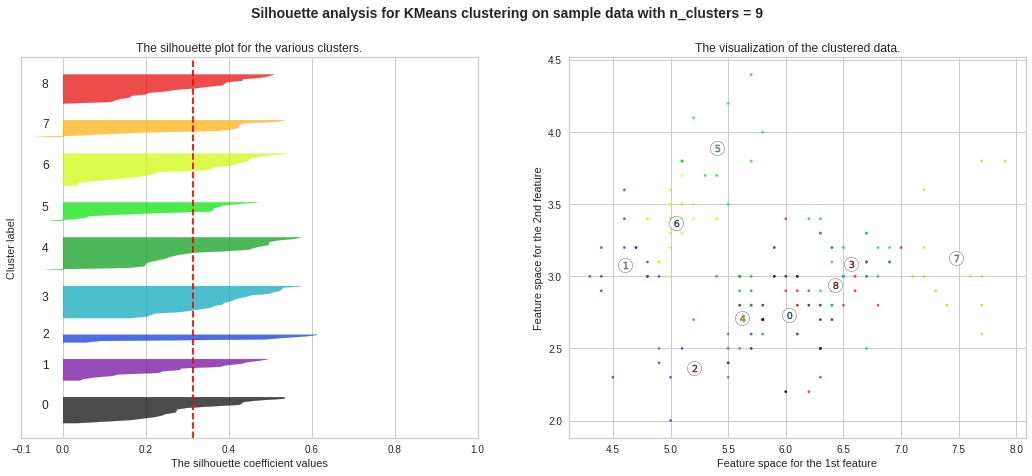

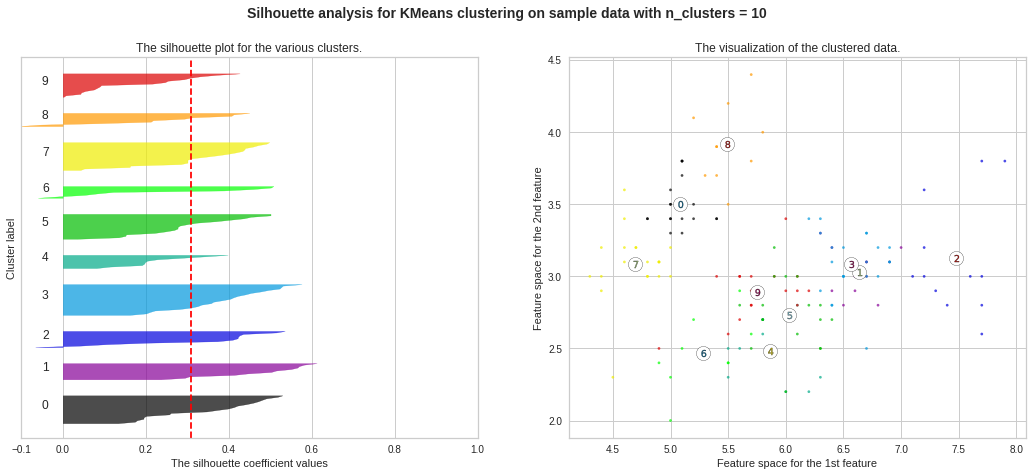

In [55]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

for n_clusters in range(2,11):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

According to previous graphs and silhouette scores optimal k is 2

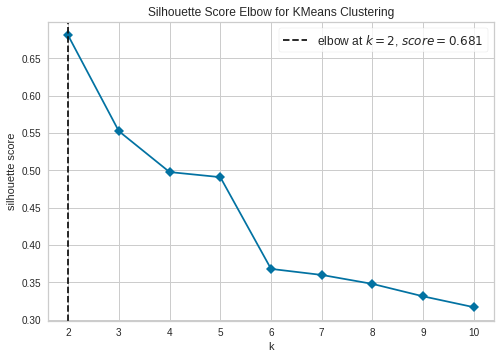

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [56]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False)
visualizer.fit(X)
visualizer.show()